# Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from pycaret.classification import *
from xgboost import XGBClassifier
pd.set_option('display.max_columns', None)

# Load CSV data

In [162]:
url = "https://docs.google.com/spreadsheets/d/1vqhSDunXT-WVXFAkWov7i3HQlCjHLxYDw8sl9tRf1zE/export?format=csv&gid=959588729"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Exploratory Data Analysis

## Data Cleaning

In [163]:
# Copy the dataframe to avoid modifying the original data
df_1 = df.copy()

# Drop irrelevant columns for analysis
df_1.drop(['track_id', 'track_name', 'Unnamed: 0', 'artists'], axis=1, inplace=True)

# Replace album names with their counts to show album popularity
df_1['album_name'] = df_1['album_name'].map(df_1['album_name'].value_counts())


In [164]:
# Label encode the 'track_genre' column
le = LabelEncoder()
df_1['track_genre'] = le.fit_transform(df_1['track_genre'])

In [165]:
df_1.head()

,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,4.0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,2.0,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,1.0,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,1.0,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,6.0,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


In [174]:
df_1['album_name'] = df_1['album_name'].fillna(1)
df_1.isnull().sum()

album_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [168]:
# Split data into features (X) and target (y)
X = df_1.loc[:,df_1.columns!='popularity']
y = df_1[['popularity']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   random_state=42)

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [169]:
# Initialize and fit GradientBoostingRegressor
gbc = GradientBoostingRegressor(max_depth=5, random_state=42, learning_rate=0.01, n_estimators=200)
gbc.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='squared_error',
                          max_depth=5, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=200, n_iter_no_change=None,
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [170]:
r2_score_list = []

for k in range(1, 17):
    selector = SelectKBest(mutual_info_regression, k=k)
    selector.fit(X_train_v2, y_train_v2)

    X_train_selected = selector.transform(X_train_v2)
    X_test_selected = selector.transform(X_test_v2)

    gbc.fit(X_train_selected, y_train_v2)
    kbest_preds = gbc.predict(X_test_selected)

    r2_score_kbest = round(r2_score(y_test_v2, kbest_preds), 3)

    r2_score_list.append(r2_score_kbest)

<Figure size 800x550 with 0 Axes>

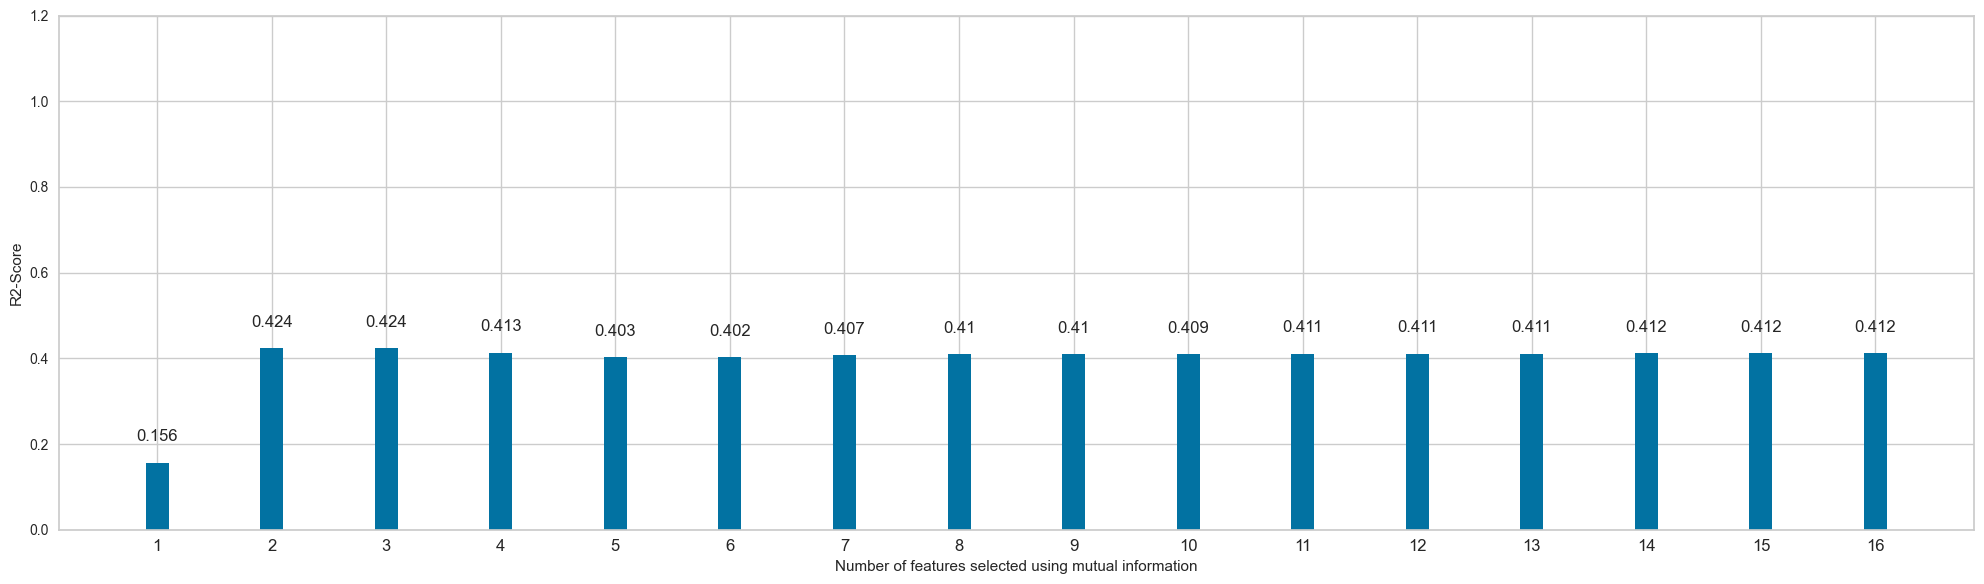

In [171]:
# Plot feature selection performance
plt.figure()

fig, ax = plt.subplots(figsize=(20, 6))

x = np.arange(1, 17)
y = r2_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('R2-Score')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 17))
ax.set_xticklabels(np.arange(1, 17), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')

plt.tight_layout()

## Applying PyCaret

In [178]:
from pycaret.regression import *
s = setup(df_1, target = 'popularity', session_id = 123)

,Description,Value
0,Session id,123
1,Target,popularity
2,Target type,Regression
3,Original data shape,"(114000, 17)"
4,Transformed data shape,"(114000, 17)"
5,Transformed train set shape,"(79800, 17)"
6,Transformed test set shape,"(34200, 17)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [179]:
# Compare models with the updated dataset
best_model = compare_models()
print(best)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:49:46
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,8.6078,145.9844,12.0820,0.7062,0.7536,0.4702,10.9780
et,Extra Trees Regressor,8.7884,152.7834,12.3603,0.6925,0.7406,0.4770,4.2900
xgboost,Extreme Gradient Boosting,9.2811,163.1398,12.7717,0.6717,0.8616,0.5272,0.2440
catboost,CatBoost Regressor,9.4683,166.9223,12.9187,0.6641,0.8845,0.5417,3.4880
lightgbm,Light Gradient Boosting Machine,10.2112,189.7202,13.7728,0.6182,0.9171,0.5741,0.2350
gbr,Gradient Boosting Regressor,12.6130,263.5073,16.2322,0.4697,1.0498,0.7325,2.3350
dt,Decision Tree Regressor,10.5743,303.6599,17.4226,0.3887,0.8606,0.5279,0.2160
ada,AdaBoost Regressor,15.8802,357.4221,18.9051,0.2806,1.3186,1.1188,0.6570
lar,Least Angle Regression,15.8195,369.4605,19.2209,0.2564,1.2862,1.0753,0.0400
br,Bayesian Ridge,15.8260,369.4321,19.2202,0.2564,1.2860,1.0752,0.0500


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)


In [180]:
## X_train, X_test, y_train, y_test
rf = RandomForestRegressor(n_jobs=-1, random_state=123, n_estimators=200)

rf.fit(X_train, y_train)

train_pred = rf.predict(X_train)

test_pred = rf.predict(X_test)

In [181]:
r2_score_train = r2_score(train_pred,y_train)
r2_score_test = r2_score(test_pred,y_test)


print(r2_score_train)
print(r2_score_test)

0.9489570453084925
0.5286462973040116


Overfitting: The model has an R² of 0.95, indicating that it explains a great amount of variance. However, the low MAPE suggests that the model may not be accurate in individual predictions.

In [182]:
## Lets bin our target and make it a classifier

df_2 = df_1.copy()

bins = [0, 20, 40, 60, 80, 100]

labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

df_2['score_binned'] = pd.cut(df_2['popularity'], bins=bins, labels=labels, include_lowest=True)

df_2.drop(['popularity'], axis=1, inplace=True)

df_2.head()


,album_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,score_binned
0,4.0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,60-80
1,2.0,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,40-60
2,1.0,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,40-60
3,1.0,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,60-80
4,6.0,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,80-100


## Check the Imbalance

In [183]:
df_2['score_binned'].value_counts()

score_binned
0-20      34177
20-40     33149
40-60     33104
60-80     12616
80-100      954
Name: count, dtype: int64

In [184]:
## Binning the target variable for classification
df_3 = df_1.copy()
bins = [0, 30, 100]
labels = ['Top 30', 'Below 30']
df_3['score_binned'] = pd.cut(df_3['popularity'], bins=bins, labels=labels, include_lowest=True)

# Drop the original popularity column
df_3.drop(['popularity'], axis=1, inplace=True)

df_3['score_binned'].value_counts()


score_binned
Below 30    62244
Top 30      51756
Name: count, dtype: int64

In [185]:
df_3['score_binned'].value_counts()

score_binned
Below 30    62244
Top 30      51756
Name: count, dtype: int64

In [186]:
X = df_3.loc[:,df_3.columns!='score_binned']
y = df_3[['score_binned']]

In [187]:
s = setup(df_3, target = 'score_binned', session_id = 123)

,Description,Value
0,Session id,123
1,Target,score_binned
2,Target type,Regression
3,Original data shape,"(114000, 17)"
4,Transformed data shape,"(114000, 17)"
5,Transformed train set shape,"(79800, 17)"
6,Transformed test set shape,"(34200, 17)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

In [189]:
# Train-test split
X = df_3.loc[:,df_3.columns!='score_binned']
y = df_3[['score_binned']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   stratify = y,
                                                   random_state=42)

In [190]:
rfcls = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
rfcls.fit(X_train, y_train)

# Predictinos
rf_model_train = rfcls.predict(X_train)
rf_model_test = rfcls.predict(X_test)

# Evaluate the model
print("Accuracy Train: ", accuracy_score(rf_model_train, y_train))
print("Accuracy Test: ", accuracy_score(rf_model_test, y_test))
print("F1 Score Train: ", f1_score(rf_model_train, y_train, average='weighted'))
print("F1 Score Test: ", f1_score(rf_model_test, y_test, average='weighted'))


Accuracy Train:  0.9995864661654136
Accuracy Test:  0.8530994152046784
F1 Score Train:  0.9995864676085696
F1 Score Test:  0.854328533270504


In [194]:
print(classification_report(y_test, rf_model_test, target_names=['Not Top 30', 'Below 30']))


              precision    recall  f1-score   support

  Not Top 30       0.83      0.92      0.87     18673
    Below 30       0.89      0.78      0.83     15527

    accuracy                           0.85     34200
   macro avg       0.86      0.85      0.85     34200
weighted avg       0.86      0.85      0.85     34200



## Decision Tree

In [195]:
# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_classifier.fit(X_train, y_train)

# Predict on train and test data
dt_train_preds_class = dt_classifier.predict(X_train)
dt_test_preds_class = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_train_dt = accuracy_score(y_train, dt_train_preds_class)
accuracy_test_dt = accuracy_score(y_test, dt_test_preds_class)
f1_train_dt = f1_score(y_train, dt_train_preds_class, average='weighted')
f1_test_dt = f1_score(y_test, dt_test_preds_class, average='weighted')

print(f"Accuracy (Train): {accuracy_train_dt}")
print(f"Accuracy (Test): {accuracy_test_dt}")
print(f"F1 Score (Train): {f1_train_dt}")
print(f"F1 Score (Test): {f1_test_dt}")

Accuracy (Train): 0.9995864661654136
Accuracy (Test): 0.8165497076023391
F1 Score (Train): 0.9995864502247441
F1 Score (Test): 0.816527499853533


## XGBost

In [196]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode the 'score_binned' column (which has string categories) to numeric values
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Initialize XGBClassifier
xgb_cls = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.01, random_state=42)

# Fit the model with encoded target variable
xgb_cls.fit(X_train, y_train_encoded)

# Make predictions on both train and test data
y_train_pred = xgb_cls.predict(X_train) 
y_pred = xgb_cls.predict(X_test)

# Evaluate the model on training data
accuracy_train_xg = accuracy_score(y_train_encoded, y_train_pred)
f1_train_xg = f1_score(y_train_encoded, y_train_pred, average='weighted')
accuracy_test_xg = accuracy_score(y_test_encoded, y_pred)
f1_test_xg = f1_score(y_test_encoded, y_pred, average='weighted')

# Print results
print(f"Accuracy (Train): {accuracy_train_xg}")
print(f"Accuracy (Test): {accuracy_test_xg}")
print(f"F1 Score (Train): {f1_train_xg}")
print(f"F1 Score (Test): {f1_test_xg}")

Accuracy (Train): 0.7652506265664161
Accuracy (Test): 0.7636257309941521
F1 Score (Train): 0.7576353058999639
F1 Score (Test): 0.7559422047729686


## K-Nearest Neighbors

In [200]:
# Initialize KNNClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model with encoded target variable
knn.fit(X_train, y_train_encoded)

# Make predictions on both train and test data
y_train_pred_knn = knn.predict(X_train)
y_pred_knn = knn.predict(X_test)

# Evaluate the model on training data
accuracy_train_knn = accuracy_score(y_train_encoded, y_train_pred_knn)
f1_train_knn = f1_score(y_train_encoded, y_train_pred_knn, average='weighted')
accuracy_test_knn = accuracy_score(y_test_encoded, y_pred_knn)
f1_test_knn = f1_score(y_test_encoded, y_pred_knn, average='weighted')

print(f"Accuracy (Train): {accuracy_train_knn}")
print(f"Accuracy (Test): {accuracy_test_knn}")
print(f"F1 Score (Train): {f1_train_knn}")
print(f"F1 Score (Test): {f1_test_knn}")

Accuracy (Train): 0.7656015037593985
Accuracy (Test): 0.6421637426900585
F1 Score (Train): 0.7625170273754667
F1 Score (Test): 0.6370568901910085
